# CH04: Questions & Exercises

## 1. Read 'Intro to Data Structures' from panda tutorial (https://pandas.pydata.org/pandas-docs/stable/dsintro.html)

In [3]:
import numpy as np
import pandas as pd

### Series

Series is a one-dimensional labeled array capable of holding any data type

In [11]:
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e']) # from ndarray

a    0.543828
b    0.671628
c    0.211173
d   -0.518766
e   -0.277745
dtype: float64

In [13]:
pd.Series(dict(one=1, two=2, four=3), index=["one", "two", "three", "four"]) # from dict

one      1.0
two      2.0
three    NaN
four     3.0
dtype: float64

In [16]:
pd.Series(5, index=['a', 'b', 'c']) # from scalar

a    5
b    5
c    5
dtype: int64

In [18]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [31]:
s[['a', 'b']]

a   -1.293489
b    0.217757
dtype: float64

In [33]:
s.get('z', np.nan)

nan

#### Vectorized operations and label alignment with Series

In [35]:
s ** 2

a    1.673113
b    0.047418
c    0.269694
d    2.245387
e    0.548872
dtype: float64

A key difference between Series and ndarray is that operations between Series automatically align the data based on label.

In [37]:
s1 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s2 = pd.Series(np.random.randn(5), index=['c', 'd', 'e', 'f', 'g'])
s1 + s2

a         NaN
b         NaN
c    1.615717
d   -0.936478
e    2.203425
f         NaN
g         NaN
dtype: float64

In [39]:
s1 = pd.Series(np.random.randn(5), name="s1")
s2 = pd.Series(np.random.randn(3), name="s2")
s1 + s2

0   -2.472538
1   -0.217626
2   -1.229742
3         NaN
4         NaN
dtype: float64

### DataFrame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

#### From dict of Series or dicts

In [45]:
d = {
     'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}

pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [46]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [80]:
data = { "a": dict(one=1, two=2), "b": dict(one=2, two=3) }
pd.DataFrame.from_dict(data)

,a,b
one,1,2
two,2,3


#### From structured or record array

In [55]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
data[:] = [(1,2.,'Hello'), (2,3.,"World")]

In [56]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [57]:
pd.DataFrame(data, index=["one", "two"])


,A,B,C
one,1,2.0,b'Hello'
two,2,3.0,b'World'


In [61]:
pd.DataFrame(data, columns=['A', 'B', 'C', 'D'])

,A,B,C,D
0,1,2.0,b'Hello',NaN
1,2,3.0,b'World',NaN


#### From a list of dicts

In [65]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [71]:
pd.DataFrame(data2, columns=['a', 'b', 'c', 'd'], index=['one', 'two'])

,a,b,c,d
one,1,2,NaN,NaN
two,5,10,20.0,NaN


In [81]:
pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])])

,A,B
0,1,4
1,2,5
2,3,6


#### From a dict of tuples

In [75]:
df = pd.DataFrame({
    ('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
    ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
    ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
    ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
    ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}
})
df

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [78]:
df['a'][['a']]

a
A B  4.0
  C  3.0
  D  NaN

#### Column selection, addition, deletion

In [98]:
d = {
     'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}

In [99]:
df = pd.DataFrame(d)

In [100]:
df['one'] # return Series

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [101]:
df[["one"]] # return DataFrame

,one
a,1.0
b,2.0
c,3.0
d,NaN


In [102]:
df["three"] = df["one"] * df["two"]
df["four"] = 5
del df["two"]
df["new"] = pd.Series(np.random.randn(5), index=['a', 'b', 'd', 'e', 'f'])

In [104]:
df

,one,three,four,new
a,1.0,1.0,5,0.398134
b,2.0,4.0,5,0.127304
c,3.0,9.0,5,NaN
d,NaN,NaN,5,-0.485805


#### Assigning New Columns in Method Chains

Inspired by dplyr’s mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns.

In [146]:
# load iris dataset
from sklearn import datasets

source = datasets.load_iris()
iris = pd.DataFrame(source.data, columns=[ "_".join(x.split(" ")[:-1]) for x in source.feature_names ])
iris["name"] = source.target_names[source.target]

In [147]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [150]:
iris.assign(sepal_ratio = iris["sepal_length"]/iris["sepal_width"]).head() #assign creates copy of DF

,sepal_length,sepal_width,petal_length,petal_width,name,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,1.457143
1,4.9,3.0,1.4,0.2,setosa,1.633333
2,4.7,3.2,1.3,0.2,setosa,1.468750
3,4.6,3.1,1.5,0.2,setosa,1.483871
4,5.0,3.6,1.4,0.2,setosa,1.388889


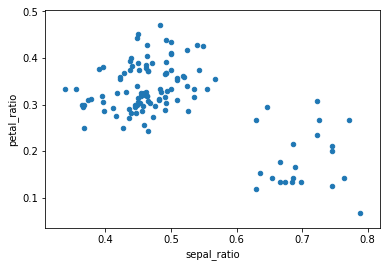

In [164]:
iris.query("sepal_length > 5").assign(
    sepal_ratio = lambda x: x["sepal_width"]/x["sepal_length"],
    petal_ratio = lambda x: x["petal_width"]/x["petal_length"]
).plot(kind="scatter", x="sepal_ratio", y="petal_ratio")

#### Indexing / Selection

In [166]:
df = pd.DataFrame({
    'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
})

In [168]:
df.loc["a"]

one    1.0
two    1.0
Name: a, dtype: float64

In [169]:
df.iloc[0]

one    1.0
two    1.0
Name: a, dtype: float64

#### Data alignment and arithmetic

In [172]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])

In [173]:
df

,A,B,C,D
0,-1.069900,0.088236,0.214342,-0.571256
1,2.056455,-1.716360,-0.014857,0.032942
2,1.538230,-0.215852,-0.025549,0.069170
3,1.747840,1.884837,-1.452316,1.286358
4,-0.186702,2.646112,-0.645515,1.603443
5,0.932601,-0.193115,-0.325674,-1.057481
6,0.314837,0.403682,0.679972,-1.657066
7,-0.573488,-0.369529,-0.538380,-1.081356
8,-0.183687,-1.471556,-0.805445,-1.422602
9,0.080259,0.265750,0.075279,0.807850


In [174]:
df2

,A,B,C
0,-0.600120,0.400082,-0.430643
1,1.582850,1.163524,-1.145350
2,1.311341,1.011865,-0.164922
3,-1.848162,-0.130352,-0.847354
4,1.144522,-0.969319,0.273177
5,0.222155,0.787582,-0.849413
6,-1.462428,0.577994,1.385249


In [175]:
df + df2

,A,B,C,D
0,-1.670020,0.488318,-0.216301,NaN
1,3.639305,-0.552836,-1.160207,NaN
2,2.849572,0.796013,-0.190471,NaN
3,-0.100322,1.754485,-2.299670,NaN
4,0.957819,1.676793,-0.372337,NaN
5,1.154757,0.594466,-1.175087,NaN
6,-1.147590,0.981676,2.065222,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [176]:
df * 2 + 10

,A,B,C,D
0,7.860199,10.176473,10.428684,8.857487
1,14.112909,6.567279,9.970286,10.065883
2,13.076460,9.568297,9.948903,10.138340
3,13.495680,13.769675,7.095368,12.572717
4,9.626596,15.292224,8.708971,13.206887
5,11.865203,9.613769,9.348653,7.885038
6,10.629675,10.807365,11.359945,6.685868
7,8.853023,9.260941,8.923241,7.837287
8,9.632625,7.056888,8.389110,7.154796
9,10.160518,10.531499,10.150558,11.615700


#### Transposing

In [178]:
df.T

,0,1,2,3,4,5,6,7,8,9
A,-1.069900,2.056455,1.538230,1.747840,-0.186702,0.932601,0.314837,-0.573488,-0.183687,0.080259
B,0.088236,-1.716360,-0.215852,1.884837,2.646112,-0.193115,0.403682,-0.369529,-1.471556,0.265750
C,0.214342,-0.014857,-0.025549,-1.452316,-0.645515,-0.325674,0.679972,-0.538380,-0.805445,0.075279
D,-0.571256,0.032942,0.069170,1.286358,1.603443,-1.057481,-1.657066,-1.081356,-1.422602,0.807850


#### DataFrame interoperability with NumPy functions

Elementwise NumPy ufuncs (log, exp, sqrt, ...) and various other NumPy functions can be used with no issues on DataFrame, assuming the data within are numeric:

In [180]:
df = pd.DataFrame({
    'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
})

In [181]:
np.exp(df)

,one,two
a,2.718282,2.718282
b,7.389056,7.389056
c,20.085537,20.085537
d,NaN,54.598150


In [182]:
np.asarray(df)

array([[  1.,   1.],
       [  2.,   2.],
       [  3.,   3.],
       [ nan,   4.]])

In [185]:
s = pd.Series(np.random.randn(5))
s

0   -1.419129
1   -0.637845
2    2.000735
3   -1.117479
4   -2.028502
dtype: float64

In [184]:
s.dot(s)

7.413153310763934

#### Console display

In [187]:
print(iris)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

In [188]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
name            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [195]:
iris[["sepal_length", "sepal_width"]].iloc[0:10,:].to_string()

'   sepal_length  sepal_width\n0           5.1          3.5\n1           4.9          3.0\n2           4.7          3.2\n3           4.6          3.1\n4           5.0          3.6\n5           5.4          3.9\n6           4.6          3.4\n7           5.0          3.4\n8           4.4          2.9\n9           4.9          3.1'

#### DataFrame column attribute access and IPython completion

In [197]:
df = pd.DataFrame({
    'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
})

df.one

## 3. Read '4.3. Preprocessing data'

http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

### 4.3.1. Standardization, or mean removal and variance scaling

In [3]:
from sklearn import preprocessing
import numpy as np

In [6]:
X_train = np.array([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]])
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [7]:
X_scaled = preprocessing.scale(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [8]:
X_scaled.mean(axis=0)

array([ 0.,  0.,  0.])

In [9]:
X_scaled.std(axis=0)

array([ 1.,  1.,  1.])

In [21]:
scaler = preprocessing.StandardScaler().fit(X_train) # enable to apply the same standarization to different datasets

StandardScaler: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [12]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [14]:
scaler.mean_

array([ 1.        ,  0.        ,  0.33333333])

In [19]:
scaler.scale_

array([ 0.81649658,  0.81649658,  1.24721913])

In [20]:
X_test = [[-1., 1., 0.]]
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

#### 4.3.1.1. Scaling features to a range

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

In [24]:
X_train = np.array([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]])

In [25]:
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)

In [27]:
X_train_minmax = min_max_scaler.transform(X_train)
X_train_minmax

array([[ 0.5       ,  0.        ,  1.        ],
       [ 1.        ,  0.5       ,  0.33333333],
       [ 0.        ,  1.        ,  0.        ]])

In [28]:
def minmax_scale(X, min=0, max=1):
    X_scaled = (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))
    return X_scaled*(max - min) + min

In [29]:
minmax_scale(X_train)

array([[ 0.5       ,  0.        ,  1.        ],
       [ 1.        ,  0.5       ,  0.33333333],
       [ 0.        ,  1.        ,  0.        ]])

MaxAbsScaler works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

In [30]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(X_train)

In [32]:
X_train_maxabs = max_abs_scaler.transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

#### 4.3.1.2. Scaling sparse data

Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales.

#### 4.3.1.3. Scaling data with outliers

If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use robust_scale and RobustScaler as drop-in replacements instead. They use more robust estimates for the center and range of your data.

In [44]:
X_train = np.array([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.], [5.0, 1.0, 10.0]])

In [45]:
robust_scaler = preprocessing.RobustScaler().fit(X_train)
standard_scaler = preprocessing.StandardScaler().fit(X_train)

In [46]:
robust_scaler.transform(X_train)

array([[-0.25      , -1.2       ,  0.23529412],
       [ 0.25      , -0.4       , -0.23529412],
       [-0.75      ,  0.4       , -0.47058824],
       [ 1.75      ,  0.4       ,  2.11764706]])

In [47]:
standard_scaler.transform(X_train)

array([[-0.53452248, -1.50755672, -0.17349448],
       [ 0.        , -0.30151134, -0.63614643],
       [-1.06904497,  0.90453403, -0.8674724 ],
       [ 1.60356745,  0.90453403,  1.6771133 ]])

### 4.3.2. Non-linear transformation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [50]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [52]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)

X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) 

array([ 4.3,  5.1,  5.8,  6.5,  7.9])

(array([ 1.07142879,  0.98214305,  0.98214305,  0.80357159,  0.98214305,
         1.16071452,  0.89285732,  1.16071452,  0.89285732,  1.07142879]),
 array([  9.99999998e-08,   1.00000080e-01,   2.00000060e-01,
          3.00000040e-01,   4.00000020e-01,   5.00000000e-01,
          5.99999980e-01,   6.99999960e-01,   7.99999940e-01,
          8.99999920e-01,   9.99999900e-01]),
 <a list of 10 Patch objects>)

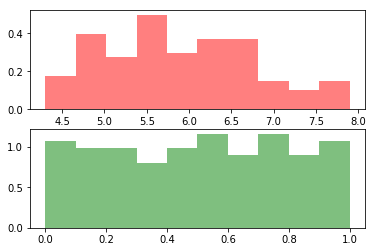

In [82]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, sharex=False)
axarr[0].hist(X_train[:,0], 10, normed=1, facecolor='red', alpha=0.5)
axarr[1].hist(X_train_trans[:,0], 10, normed=1, facecolor='green', alpha=0.5)

In [83]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

array([ 4.4  ,  5.125,  5.75 ,  6.175,  7.3  ])

In [84]:
np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])

array([ 0.01351351,  0.25012513,  0.47972973,  0.6021021 ,  0.94144144])

### 4.3.3. Normalization

Normalization is the process of scaling **individual samples**(not features) to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [87]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

In [88]:
normalizer = preprocessing.Normalizer().fit(X)

In [91]:
X_norm = normalizer.transform(X)
X_norm

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [95]:
np.sqrt(X_norm[:,0].dot(X_norm[:,0]))

1.0801234497346435

In [98]:
np.linalg.norm(X_norm, axis=1)

array([ 1.,  1.,  1.])

### 4.3.4. Binarization

#### 4.3.4.1. Feature binarization

Feature binarization is the process of thresholding numerical features to get boolean values.

In [101]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

In [108]:
binarizer = preprocessing.Binarizer(threshold=-0.01).fit(X)

In [109]:
binarizer.transform(X)

array([[ 1.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  0.]])

### 4.3.5. Encoding categorical features

In [123]:
X = np.array([["male", 15], 
              ["female", 18], 
              ["female", 21]])

In [126]:
le = preprocessing.LabelEncoder().fit(X[:,0])
X[:,0] = le.transform(X[:,0])

In [136]:
enc = preprocessing.OneHotEncoder(categorical_features=[0]).fit(X)
enc.transform(X).toarray()

array([[  0.,   1.,  15.],
       [  1.,   0.,  18.],
       [  1.,   0.,  21.]])

### 4.3.6. Imputation of missing values

In [144]:
X = np.array([[1, 2], [np.nan, 3], [7, 6]])
X

array([[  1.,   2.],
       [ nan,   3.],
       [  7.,   6.]])

In [138]:
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)                  

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [143]:
X = np.array([[np.nan, 2], [6, np.nan], [7, 6]])
X

array([[ nan,   2.],
       [  6.,  nan],
       [  7.,   6.]])

In [142]:
imp.transform(X)

array([[ 4.        ,  2.        ],
       [ 6.        ,  3.66666667],
       [ 7.        ,  6.        ]])

### 4.3.7. Generating polynomial features

In [147]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [150]:
poly = preprocessing.PolynomialFeatures(2).fit(X)

In [151]:
poly.transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

### 4.3.8. Custom transformers

In [154]:
X = np.array([[0, 1], [2, 3]])
X

array([[0, 1],
       [2, 3]])

In [161]:
transformer = preprocessing.FunctionTransformer(lambda x: np.ones(x.shape))

In [162]:
transformer.transform(X)

array([[ 1.,  1.],
       [ 1.,  1.]])